# Summary

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

Based on the given feature variables (e.g. age, sex etc.) this workbook  aims to predict who was more likely to survive the incident.

Framework:

1. Problem Definition 
2. Data
3. Evaluation 
4. Features
5. Modelling
6. Experimentation (tuning)

## 1. Problem Definition 

> Based on the given characteristics of a person (age, sex) and their socio-economic status who was more likely to survive the Titanic incident in 1912.

## 2. Data 

> The data is available on Kaggle : https://www.kaggle.com/c/titanic/overview and comes in two parts:
    Training and Test sets 

## 3. Evaluation 

> As per the competition's rules, the evaluation is based on the submitted predictions' accuracy score, nontheless this workbook will explore other evaluation metrics available in Scikit-learn as well. (E.g. cross-validation accuracy score, precision, recall and f1 scores)

## 4. Features

* pclass : Ticket class
    1 = 1st, 2 = 2nd, 3 = 3rd
* sex
    male, female
* Age : Age in years
* sibsp : # of siblings / spouses aboard the Titanic
* parch: # of parents / children aboard the Titanic
* ticket : Ticket number
* fare: Passenger fare
* cabin: Cabin number
* embarked :Port of Embarkation
    C = Cherbourg, Q = Queenstown, S = Southampton

Plus Dependent Variable: Survival: 0 = No, 1 = Yes

## 5. Modelling

### Phase 1 : EDA Process

In [1]:
# Import necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Import modelling tools 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Preprocessing tools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Evaluation metrics 

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, RocCurveDisplay, recall_score, precision_score, f1_score

In [2]:
# Import Training and Test sets as a DataFrames

df_training = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_combined = pd.concat([df_training, df_test], sort = True).reset_index(drop = True)
df_combined.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [3]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# There are missing values in 'Age', 'Embarked' and 'Cabin' columns. 

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# There are missing values in 'Age', 'Fare' and 'Cabin' columns.

In [7]:
df_combined.describe(include = "all")

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [8]:
# There are 2-2 people with the same name and multiple individuals with the same ticket number
# df_combined.duplicated().value_counts()
df_combined[df_combined.duplicated(subset = "Name", keep = False) == True]

# All 4 individuals have different Ticket numbers, Ages etc., so these values are not duplicated. 

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
289,22.0,NaN,Q,7.7500,"Connolly, Miss. Kate",0,290,3,female,0,1.0,370373
696,44.0,NaN,S,8.0500,"Kelly, Mr. James",0,697,3,male,0,0.0,363592
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911
897,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972


In [9]:
df_combined.duplicated(subset = "Ticket", keep = False).value_counts()
df_combined.groupby("Ticket").PassengerId.count()

Ticket
110152         3
110413         3
110465         2
110469         1
110489         1
              ..
W./C. 6608     5
W./C. 6609     1
W.E.P. 5734    2
W/C 14208      1
WE/P 5735      2
Name: PassengerId, Length: 929, dtype: int64

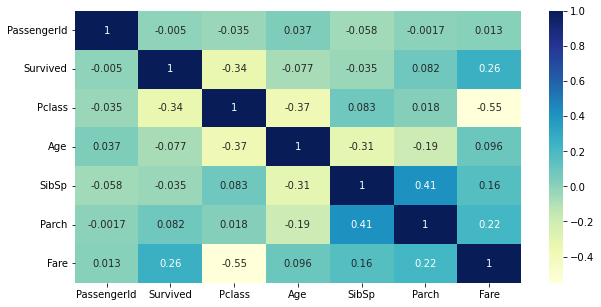

In [10]:
# Correlation Matrix for numeric variables pre-feature engineering
fig, ax = plt.subplots(figsize = (10,5))
correlation_matrix = sns.heatmap(df_training.corr(),
                                annot = True,
                                ax = ax,
                                cmap = "YlGnBu")  

There are two `relatively` strong correlation points when it comes to Survival:
 * Fare --> positive correlation: The more ticket cost the more likely that the person survived the Titanic
 * PClass --> negative correlation: With lower ticket classes (i.e. increase in PClass number) the chances of survival decreases. 
    
Additional notes: 
 * Fare correlates with Pclass (potential multicollinearity) as higher ticket classes cost more
 * To some level Fare also correlates with SibSp and Parch, which could be because family members use the same ticket. Conclusively a derived attribute of fare per person may be valuable addition to the feature variables
 * Age in its current format (prior to imputation) doesn't have a signification correlation with Survival. Nontheless, based on the matrix it has connection with PClass. (Older passangers were more likely to have higher class tickets) Thus a variable that combines PClass and Age could be a valuable asset. 

In [11]:
df_training.groupby(by = "Sex").Survived.count()

Sex
female    314
male      577
Name: Survived, dtype: int64

<AxesSubplot:title={'center':'Embarked and Survival'}, xlabel='Embarked', ylabel='Number of passengers'>

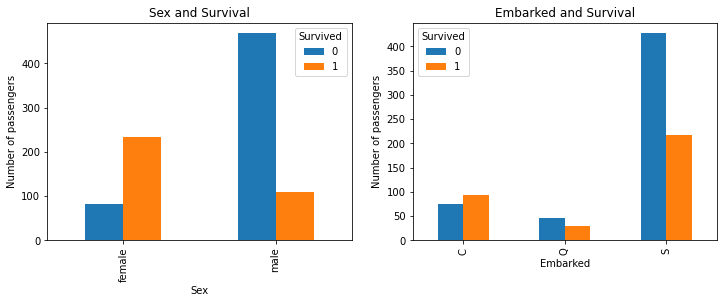

In [12]:
# Visualizing object variables vs. Survival pre-feature engineering

sex_survived_crosstab = pd.crosstab(df_training["Sex"],
                                    df_training["Survived"])

embarked_survived_crosstab = pd.crosstab(df_training["Embarked"],
                                         df_training["Survived"])

sex_survived_crosstab
fig, ax = plt.subplots(nrows = 1,
                       ncols = 2,
                       figsize = (12,4))

sex_survived_crosstab.plot(kind = "bar",
                           xlabel = "Sex",
                           ylabel = "Number of passengers",
                           title = "Sex and Survival",
                           ax = ax[0])

embarked_survived_crosstab.plot(kind = "bar",
                           xlabel = "Embarked",
                           ylabel = "Number of passengers",
                           title = "Embarked and Survival",
                           ax = ax[1])

Based on the visualizations above both sex and embarked values influenced whether a passenger survived the incident or not:
It seems females were more likely to survive and those who embarked in France had a higher possibility of survival as well. Although it's worth to note that there are imbalances in sample sizes as most people embarked at Southhampton and there were more male passengers than female

In [13]:
df_training["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
df_training["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### Feature engineering

Certain attributes like Cabin and Name should not be encoded in the model, but some valuable info can be derived from them: 

* First element (letter) of Cabin indicating the Cabin positions 
* Titles from name 


In [15]:
# Derive titles from names

def title_split(df):
    first_split = []
    titles = []
    for i in df["Name"]:
        x,y = i.split(".", maxsplit = 1)
        first_split.append(x)
    for i in first_split:
        last_name, title = i.split(",", maxsplit = 1)
        titles.append(title)
    return titles

df_training["Title"] = pd.Series(title_split(df_training))
np.unique(df_training["Title"])
pd.crosstab(df_training["Pclass"],
            df_training["Title"])
pd.crosstab(df_training["Survived"],
            df_training["Title"])

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [16]:
df_test["Title"] = pd.Series(title_split(df_test))
pd.crosstab(df_test["Sex"],
            df_test["Title"])

Title,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
female,0,1,0,0,78,0,72,1,0
male,2,0,1,21,0,240,0,0,2


In [17]:
# Categorize titles into Elite, Mr, Miss, Mrs, Ms, Master

def title_cat(df, inplace = True):
    df["Title"] = df["Title"].replace(" ", "", regex = True)
    df["Title"] = df["Title"].replace(["Capt", "Col", "Dr", "Jonkheer", "Major", "Sir", "theCountess", "Rev", "Lady"], "Elite")
    df["Title"] = df["Title"].replace("Mlle", "Miss")
    df["Title"] = df["Title"].replace(["Mme", "Dona"], "Mrs")
    df["Title"] = df["Title"].replace("Don", "Mr")
title_cat(df_training)
df_training
title_survived = pd.crosstab(df_training["Title"],
            df_training["Survived"])


<AxesSubplot:xlabel='Title'>

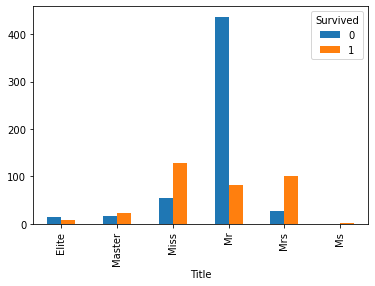

In [18]:
# Based on the crosstab above, although the sample categories are imbalance it doesn't seem as if the elite had a higher chance of survival, so the title attribute may not be a significant attribute to our model

title_survived.plot(kind = "bar")

In [19]:
# Converting Cabins to Decks : as the distance to lifeboats were dependent of the cabin's location. Going from A - G means going from top deck to bottom deck. Bottom decks were the farthest away from lifeboats. 

df_training[df_training["Cabin"].notna()].Cabin.unique()

df_training[df_training["Cabin"] == "T"]

# Converting Cabins to Decks
wholestrings = []

deck_list = ["A", "B", "C", "D", "E", "F", "G", "Unknown"]
df_training["Cabin"] = df_training["Cabin"].fillna("Unknown")
def find_deck(wholestring, substring,df):
    wholestrings.append(wholestring)
    for i in substring:
        if i in wholestring:
            return i
        if wholestring == "T":
            return "A"
        
df_training["Deck"] = df_training["Cabin"].map(lambda x : find_deck(x,deck_list, df_training))
df_training["Deck"].value_counts()

Unknown    687
C           59
B           47
E           33
D           33
A           16
F           12
G            4
Name: Deck, dtype: int64

<AxesSubplot:xlabel='Deck'>

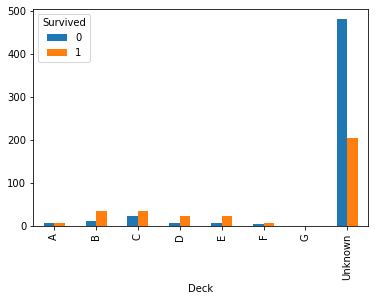

In [20]:
deck_survival = pd.crosstab(df_training["Deck"],
                            df_training["Survived"])

deck_survival.plot(kind = "bar")

In [21]:
# def simplify_deck(df, inplace = True):
#     for idx, deck in enumerate(df["Deck"]):
#         if deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
#             df["Deck"][idx] = "yes"
#         else:
#             df["Deck"][idx] = "no"


#### Deriving other attributes from existing variables

In [22]:
# Number of family members
df_training["Family_Members"] = df_training.SibSp + df_training.Parch
df_training["Family_Size"] = df_training.SibSp + df_training.Parch + 1

In [23]:
df_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Members,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,Mr,Unknown,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C,1,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss,Unknown,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,Mr,Unknown,0,1


In [24]:
# Age and Class

# first it'll be necessary to impute missing values in the Age Column (stretegy will be mean) , and with that Embarked (strategy will be "S") and Fare(strategy will be mean) will also be subject to imputation
# To keep the datarame's structure pd.fillna() is used instead of SimpleImputer()
def fill_missing_values(df):
    df["Age"].fillna(df["Age"].mean(), inplace = True)
    df["Fare"].fillna(df["Fare"].mean(), inplace = True)
    df["Embarked"].fillna("S", inplace = True)

fill_missing_values(df_training)
df_training["Age_Class"] = df_training.Age * df_training.Pclass

In [25]:
# Using Number of family members to establish ticket price per person

df_training["Fare_per_person"] = df_training.Fare / (df_training["Family_Members"] + 1)

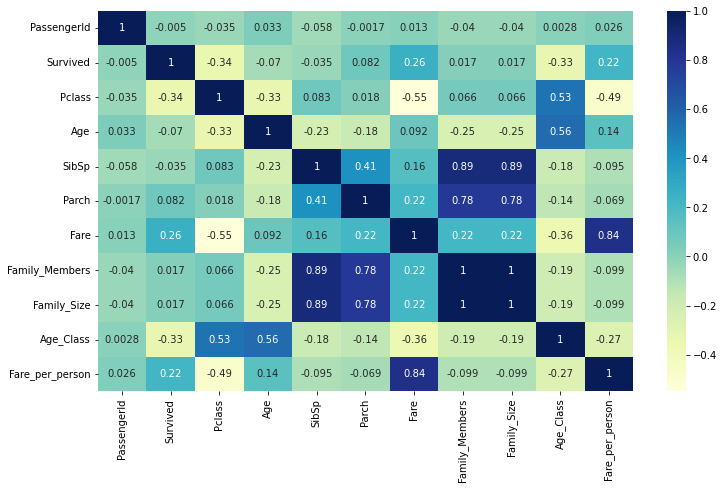

In [26]:
# Correlation Matrix post feature engineering

fig, ax = plt.subplots(figsize = (12,7))
correlation_matrix_2 = sns.heatmap(df_training.corr(),
                                   cmap = "YlGnBu",
                                   annot = True,
                                   ax = ax)

### Phase 2 : Preprocessing 

In [27]:
# Encoding object variables (Sex, Deck, Title, Embarked)

def encoder(df, inplace = True):
    df["Deck"] = df["Deck"].replace({"A" : 0, "B" : 1, "C" : 2, "D" : 3, "E": 4, "F": 5, "G": 6, "Unknown" : 7})
    df["Sex"] = df["Sex"].replace({"male" :0, "female" : 1})
    df["Title"] = df["Title"].replace({"Elite" : 0, "Master" :1, "Miss" : 2, "Mr" : 3, "Mrs": 4, "Ms": 5})
    df["Embarked"] = df["Embarked"].replace({"S" : 0, "Q" : 1, "C" : 2})
encoder(df_training)
df_training

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Deck,Family_Members,Family_Size,Age_Class,Fare_per_person
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,Unknown,0,3,7,1,2,66.000000,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,2,4,2,1,2,38.000000,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,0,2,7,0,1,78.000000,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,4,2,1,2,35.000000,26.55000
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,Unknown,0,3,7,0,1,105.000000,8.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,Unknown,0,0,7,0,1,54.000000,13.00000
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0,2,1,0,1,19.000000,30.00000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,Unknown,0,2,7,3,4,89.097353,5.86250
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,2,3,2,0,1,26.000000,30.00000


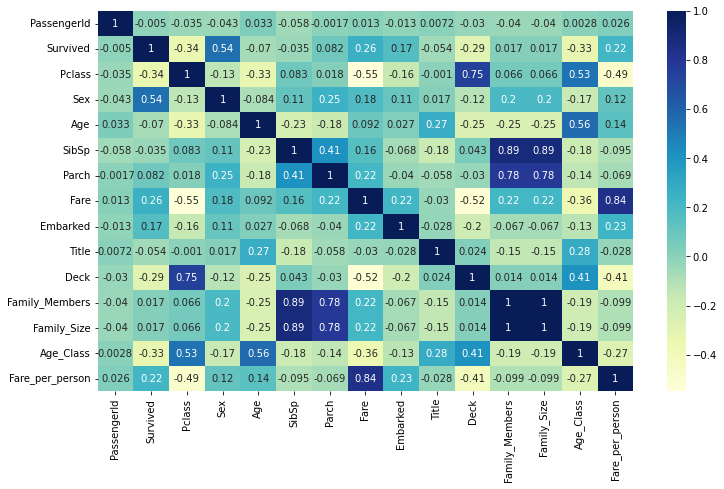

In [28]:
# Correlation Matrix post encoding

fig, ax = plt.subplots(figsize = (12,7))
correlation_matrix_2 = sns.heatmap(df_training.corr(),
                                   cmap = "YlGnBu",
                                   annot = True,
                                   ax = ax)

In [29]:
# Normalization of float attributes

scaler = MinMaxScaler(feature_range = (0,1))
df_training[["Fare_per_person", "Age_Class", "Fare", "Age"]] = scaler.fit_transform(df_training[["Fare_per_person", "Age_Class", "Fare", "Age"]])

In [30]:
# Creating a dataframe that the model will train on (eliminating certain columns like ticket number, name and cabin, passengerid etc. based on the correlation matrix)

df_train = df_training[["Pclass", "Survived", "Sex", "Age_Class", "SibSp", "Parch", "Fare", "Embarked", "Title", "Deck"]]
df_train.head()

,Pclass,Survived,Sex,Age_Class,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,0,0,0.294373,1,0,0.014151,0,3,7
1,1,1,1,0.167722,1,0,0.139136,2,4,2
2,3,1,1,0.348652,0,0,0.015469,0,2,7
3,1,1,1,0.154152,1,0,0.103644,0,4,2
4,3,0,0,0.470780,0,0,0.015713,0,3,7


In [31]:
# Separating feture variables from label
df_X = df_train.drop("Survived", axis = 1)
df_y = df_train["Survived"]
df_X.head()

,Pclass,Sex,Age_Class,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,0,0.294373,1,0,0.014151,0,3,7
1,1,1,0.167722,1,0,0.139136,2,4,2
2,3,1,0.348652,0,0,0.015469,0,2,7
3,1,1,0.154152,1,0,0.103644,0,4,2
4,3,0,0.470780,0,0,0.015713,0,3,7


In [32]:
X = df_X
y = df_y.astype(int)

In [33]:
X.shape, y.shape

((891, 9), (891,))

In [34]:
# # Splitting X and y into training and validation set using a 'test size' of 20%

# X_train, X_val, y_train, y_val = train_test_split(X,
#                                                   y,
#                                                   test_size = 0.2)
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

### Phase 3: Fitting the chosen models

In [35]:
# Creating a grid of models

np.random.seed(42)
model_grid = {
    "LogisticRegression" : LogisticRegression(max_iter = 2000),
    "KNN": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "Linear_SVC" : SVC(kernel = "linear"),
    "rbf_SVC" : SVC(),
    "GradientBoostingClassifier" : GradientBoostingClassifier()
}

results = {}

In [36]:
# Creating a loop  that fits and scores the baseline models:
np.random.seed(42)
for model_name, model in model_grid.items():
    model.fit(X, y)
    results[model_name] = np.mean(cross_val_score(model,X,y, cv =5, scoring = "accuracy"))
    

In [37]:
results

{'LogisticRegression': 0.7878852551628899,
 'KNN': 0.8103320569957944,
 'RandomForestClassifier': 0.810344611135522,
 'Linear_SVC': 0.7867365513778168,
 'rbf_SVC': 0.7934906785512522,
 'GradientBoostingClassifier': 0.8327788588286988}

### Phase 4: Hyperparameter tuning 

#### Logististic Regression

In [38]:
model_log = LogisticRegression(random_state = 42)
gs_param_log = {
    "penalty" : ["l1","l2"],
    "C" : np.logspace(-4,4,20),
    "solver" : ["liblinear"]
    
}

gs_model = GridSearchCV(model_log, gs_param_log, cv = 5, verbose = True)
gs_model.fit(X, y)
np.mean(cross_val_score(gs_model, X, y, cv = 5))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Fitting 5 folds for each of 40 candidates, totalling 200 fits


0.7890025735986442

In [39]:
gs_model.best_params_

{'C': 0.03359818286283781, 'penalty': 'l2', 'solver': 'liblinear'}

#### RandomForestClassifier

In [40]:
model_rf = RandomForestClassifier(random_state = 42)
gs_param_rf = {
    "n_estimators" : np.arange(10,500,50),
    "max_depth" : [None, 10],
    "min_samples_split" : [4,6],
    "min_samples_leaf" : [1,2],
    "max_features" : ["auto", "log2"]
}

gs_model = GridSearchCV(model_rf, gs_param_rf, cv = 5, verbose = True)
gs_model.fit(X,y)
np.mean(cross_val_score(gs_model, X, y, cv = 5))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits


0.8350260498399347

In [41]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 110}

#### KNN

In [42]:
np.random.seed(42)
model_knn = KNeighborsClassifier()
gs_param_knn = {
    "leaf_size" : list(range(1,31,10)),
    "n_neighbors" : list(range(1,41,10)),
    "p" : [1,2]
}

gs_model = GridSearchCV(model_knn, gs_param_knn, cv = 5, verbose = True)
gs_model.fit(X,y)
np.mean(cross_val_score(gs_model, X, y, cv = 5))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Fitting 5 folds for each of 24 candidates, totalling 120 fits


0.8215617349821104

In [43]:
gs_model.best_params_

{'leaf_size': 1, 'n_neighbors': 11, 'p': 1}

#### GradientBoostingClassifier

In [44]:
model_gr = GradientBoostingClassifier()
gs_param_gr = {
    "n_estimators" : np.arange(10,300,50),
    "max_depth" : [None,5, 10],
    "min_samples_split" : [4,6],
    "min_samples_leaf" : [1,2],
    "max_features" : ["auto", "log2"],
    "learning_rate" : [0.05]
}

gs_model = GridSearchCV(model_gr, gs_param_gr, cv = 5, verbose = True)
gs_model.fit(X,y)
np.mean(cross_val_score(gs_model,
                        X,
                        y,
                        cv = 5))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


0.8339087314041805

In [45]:
gs_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 210}

### Phase 5 : Fitting the best scoring model (i.e. RandomForestClassifier) on the entire training set

In [46]:
clf = GradientBoostingClassifier(learning_rate = 0.05,
                                 max_depth = 5,
                                 max_features = "log2",
                                 min_samples_leaf = 2,
                                 min_samples_split = 4,
                                 n_estimators = 210,
                                 random_state = 42)

clf.fit(X,y)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features='log2',
                           min_samples_leaf=2, min_samples_split=4,
                           n_estimators=210, random_state=42)

In [47]:
cross_val = cross_val_score(clf,
                            X,
                            y,
                            cv = 5)
np.mean(cross_val)

0.840631473228297

#### Feature importance

<AxesSubplot:>

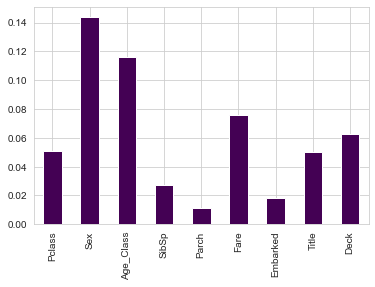

In [48]:
from sklearn.inspection import permutation_importance
sns.set_style("whitegrid")

result = permutation_importance(
    clf, X, y, n_repeats=10, random_state=42, n_jobs=2
)
feature_names = df_X.columns
forest_importances = pd.Series(result.importances_mean, index=feature_names)
forest_importances.plot(kind = "bar",
                        colormap ="viridis")

### Phase 6: Evaluation

<AxesSubplot:title={'center':'Evaluation Metrics'}>

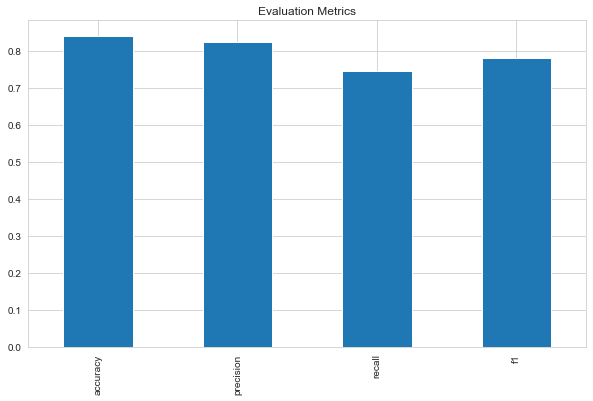

In [49]:
scoring_types = ["accuracy", "precision", "recall", "f1"]
scores = []
def score_plots(model):
    for i in scoring_types: 
        x = np.mean(cross_val_score(model, X, y, cv = 5, scoring = i))
        scores.append(x)
    df_scores = pd.DataFrame(scores, index = (scoring_types))
    fig, ax = plt.subplots(figsize = (10,6))
    score_plot = df_scores.plot.bar(title = "Evaluation Metrics",
                                    ax = ax, 
                                    legend = None)
    return score_plot

score_plots(clf)    

KeyError: "None of [Int64Index([168, 169, 170, 171, 173, 174, 175, 176, 177, 178,\n            ...\n            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],\n           dtype='int64', length=712)] are in the [columns]"

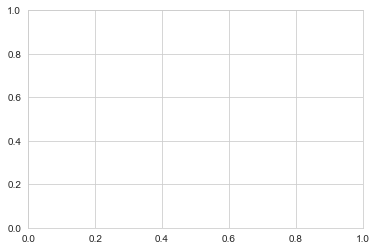

In [50]:
# Plotting cross validated Roc Curve 

cv = StratifiedKFold(n_splits=5)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for idx, (train, test) in enumerate(cv.split(X, y)):
    clf.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        clf,
        X[test],
        y[test],
        name=f"ROC fold {i +1}",
        ax=ax,
    )
#     interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#     interp_tpr[0] = 0.0
#     tprs.append(interp_tpr)
#     aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle="--",  color="r", label="Random")

### Phase 7 : Creating predictions on the test set

In [ ]:
df_test

In [ ]:
# Read test set 
df_test = pd.read_csv("test.csv")

# Create titles from names
df_test["Title"] = pd.Series(title_split(df_test))
title_cat(df_test)

# Derive Decks from Cabin 
df_test["Cabin"] = df_test["Cabin"].fillna("Unknown")
df_test["Deck"] = df_test["Cabin"].map(lambda x : find_deck(x,deck_list, df_test))

# Create other attributes 
df_test["Family_Members"] = df_test.SibSp + df_test.Parch
df_test["Family_Size"] = df_test.SibSp + df_test.Parch + 1

# Imputation 
fill_missing_values(df_test)

# Create additional attributes
df_test["Age_Class"] = df_training.Age * df_training.Pclass
df_test["Fare_per_person"] = df_test.Fare / (df_test["Family_Members"] + 1)

# Encode object variables
encoder(df_test)

# Normalize float variables with scailing
df_test[["Fare_per_person", "Age_Class", "Fare", "Age"]] = scaler.fit_transform(df_test[["Fare_per_person", "Age_Class", "Fare", "Age"]])

# Collect feature variables to include in the model
df_test_final = df_test[["Pclass","Sex", "Age_Class", "SibSp", "Parch", "Fare", "Embarked", "Title", "Deck"]]

# Creating predictions on test set 
X_test = df_test_final
y_preds = clf.predict(X_test)

# Ensemble prediciton csv 

model_predictions = pd.DataFrame(df_test["PassengerId"])
model_predictions["Survived"] = y_preds

model_predictions.to_csv("Titanic_Survival_Predictions.csv")